In [18]:
# read the data and set the datetime as the index
import pandas as pd
#df = pd.read_csv(r"C:\Users\nfrq38\DS\Prj\data_set_inquiries_CN.csv",dayfirst=True, parse_dates=[0])
df = pd.read_csv("https://raw.githubusercontent.com/gusharani/project_DS/master/data_set_inquiries_CN.csv",dayfirst=True, parse_dates=[0])
df.head()


,Date,Leads,Email_Promo,Road_Show,Event,Display_Ads,Email_Promo_spent,Road_Show_spent,Event_spent,Display_Ads_spent,Est_Rev
0,2014-11-03,2,0,1,0,1,0,12000,0,7500,43270.82
1,2014-11-04,1,0,0,1,1,0,0,15000,7500,49567.10
2,2014-11-05,1,0,0,1,1,0,0,15000,7500,49567.10
3,2014-11-06,1,0,0,1,0,0,0,15000,0,33826.40
4,2014-11-07,2,0,1,1,0,0,12000,15000,0,59011.52


In [19]:

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Year'] = df.index.year
df['Month'] = df.index.month


In [20]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



In [21]:
# by monthly spent & est rev

by_monthly_spent = df[['Email_Promo_spent','Road_Show_spent','Event_spent','Display_Ads_spent','Est_Rev']].resample('M', 'sum')
by_monthly_spent.head()

C:\ProgramData\Anaconda3\envs\Python27\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  app.launch_new_instance()


,Email_Promo_spent,Road_Show_spent,Event_spent,Display_Ads_spent,Est_Rev
Date,,,,,
2014-11-30,9000,48000,135000,30000,507460.420
2014-12-31,18300,60000,180000,0,584384.128
2015-01-31,49800,72000,270000,30000,968328.368
2015-02-28,0,24000,120000,45000,432078.572
2015-03-31,19500,84000,240000,45000,862268.260


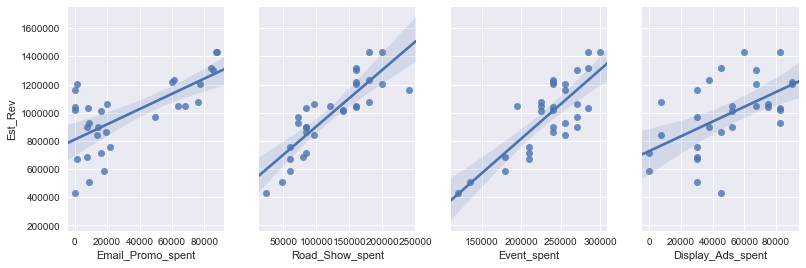

In [22]:
sns.pairplot(by_monthly_spent, x_vars=['Email_Promo_spent','Road_Show_spent','Event_spent','Display_Ads_spent',], y_vars='Est_Rev', size=4, aspect=0.7, kind='reg')


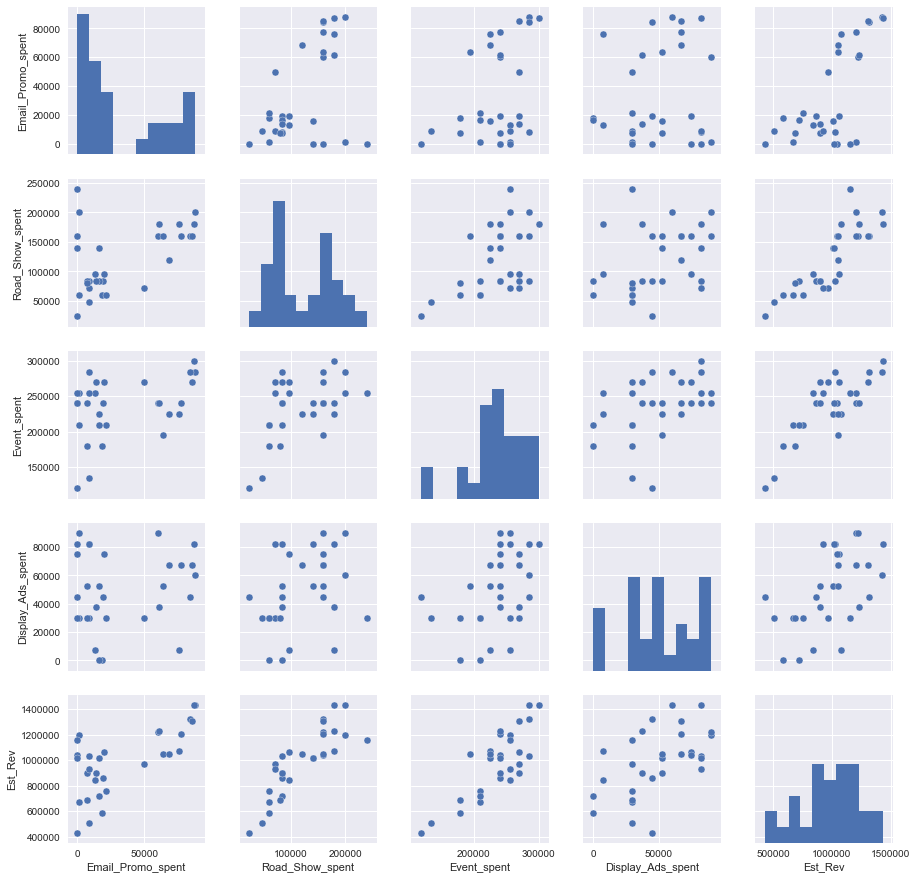

In [23]:

# scatter matrix in Seaborn
sns.pairplot(by_monthly_spent)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016944320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017FF0048>]], dtype=object)

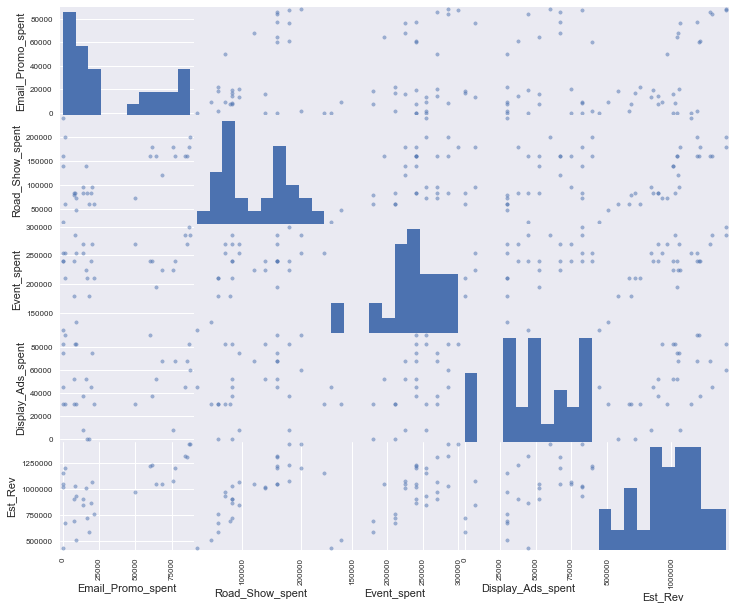

In [24]:
# scatter matrix in Pandas
pd.scatter_matrix(by_monthly_spent, figsize=(12, 10))

In [25]:
# compute correlation matrix
by_monthly_spent.corr()

,Email_Promo_spent,Road_Show_spent,Event_spent,Display_Ads_spent,Est_Rev
Email_Promo_spent,1.000000,0.492368,0.371786,0.125630,0.677987
Road_Show_spent,0.492368,1.000000,0.509372,0.325340,0.851137
Event_spent,0.371786,0.509372,1.000000,0.419926,0.800399
Display_Ads_spent,0.125630,0.325340,0.419926,1.000000,0.545404
Est_Rev,0.677987,0.851137,0.800399,0.545404,1.000000


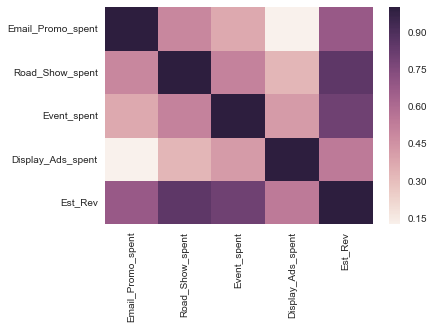

In [26]:
# display correlation matrix in Seaborn using a heatmap
sns.heatmap(by_monthly_spent.corr())



In [27]:

### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula='Est_Rev ~ Road_Show_spent', data=by_monthly_spent).fit()

# print the coefficients
lm.params


Intercept          501824.406817
Road_Show_spent         4.011632
dtype: float64

In [28]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['Road_Show_spent']
X = by_monthly_spent[feature_cols]
y = by_monthly_spent.Est_Rev

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

501824.406817
[ 4.01163218]


In [29]:
# manually calculate the prediction
501824.406817 + 4.01163218*1200

506638.365433

In [30]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Road_Show_spent': [1200]})

# predict for a new observation
lm.predict(X_new)

0    506638.365427
dtype: float64

In [31]:


### SCIKIT-LEARN ###

# predict for a new observation
linreg.predict(1200)



array([ 506638.36542671])

In [32]:
lm.conf_int()

,0,1
Intercept,374980.270956,628668.542677
Road_Show_spent,3.053838,4.969426


In [33]:
### SCIKIT-LEARN ### Multiple linear regression

# create X and y
feature_cols = ['Email_Promo_spent', 'Road_Show_spent', 'Event_spent','Display_Ads_spent']
X = by_monthly_spent[feature_cols]
y = by_monthly_spent.Est_Rev

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_


12425.4232839
[ 2.3188025   2.11687347  2.32118785  1.95777479]


In [34]:

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)


[('Email_Promo_spent', 2.3188024969501608),
 ('Road_Show_spent', 2.1168734681833841),
 ('Event_spent', 2.3211878455923021),
 ('Display_Ads_spent', 1.957774790230864)]

In [ ]:
# For a given amount of Road_Show_spent, Event_spent and Display_Ads_spent spending, 
# an increase of $1000 in Email_Promo_spent spending is associated with an increase in est_rev of 2.31 widgets.

In [35]:
### STATSMODELS ###

# create a fitted model with all 4 features
lm = smf.ols(formula='Est_Rev ~ Email_Promo_spent + Road_Show_spent + Event_spent + Display_Ads_spent ', data=by_monthly_spent).fit()

# print the p-values for the model coefficients
print lm.pvalues

Intercept            6.231216e-01
Email_Promo_spent    5.432517e-14
Road_Show_spent      1.627002e-17
Event_spent          5.464012e-16
Display_Ads_spent    4.572290e-11
dtype: float64


In [36]:
# R-squared value for the model with two features
lm = smf.ols(formula='Est_Rev ~ Email_Promo_spent + Road_Show_spent ', data=by_monthly_spent).fit()
lm.rsquared


0.81292217573785841

In [37]:
# R-squared value for the model with two features
lm = smf.ols(formula='Est_Rev ~ Email_Promo_spent + Road_Show_spent + Display_Ads_spent + Event_spent ', data=by_monthly_spent).fit()
lm.rsquared

0.99311648442457179

In [38]:
# R-squared value for the model with two features
lm = smf.ols(formula='Est_Rev ~ Email_Promo_spent +   Road_Show_spent + Display_Ads_spent ', data=by_monthly_spent).fit()
lm.rsquared


0.90094979360457861

In [39]:
# define a function that accepts X and y and computes testing RMSE
def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [40]:
# include all
feature_cols = ['Email_Promo_spent', 'Road_Show_spent', 'Event_spent','Display_Ads_spent']
X = by_monthly_spent[feature_cols]
train_test_rmse(X, y)



19201.81427463052

In [41]:


# exclude raod show
feature_cols = ['Email_Promo_spent', 'Event_spent','Display_Ads_spent']
X = by_monthly_spent[feature_cols]
train_test_rmse(X, y)



148444.43028282039

In [42]:
# Exclude Email promo
feature_cols = [ 'Road_Show_spent', 'Event_spent','Display_Ads_spent']
X = by_monthly_spent[feature_cols]
train_test_rmse(X, y)


110256.88567849789

In [43]:
# Exclude Event
feature_cols = ['Email_Promo_spent', 'Road_Show_spent', 'Display_Ads_spent']
X = by_monthly_spent[feature_cols]
train_test_rmse(X, y)


111443.22709431026

In [44]:
# Exclude Display ads
feature_cols = ['Email_Promo_spent', 'Road_Show_spent', 'Event_spent']
X = by_monthly_spent[feature_cols]
train_test_rmse(X, y)

81684.29750715656

In [45]:
# Exclude Display ads , Email promo
feature_cols = ['Road_Show_spent', 'Event_spent']
X = by_monthly_spent[feature_cols]
train_test_rmse(X, y)

127530.70913680471